In [1]:
import fastai

In [2]:
from fastai.vision import *

In [3]:


#path = '/opt/AIStorage/PLAYGROUND/data/'
path = '/opt/AIStorage/PLAYGROUND/images/1024/'

data = ImageDataBunch.from_folder(path,valid='validation', size=512, bs=16, ds_tfms=(rand_pad(2, 512), []))


epochs=25
arch = models.densenet121
#arch = models.resnet34

    
    

In [4]:
#learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True).to_fp16()
learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True)
#learn = cnn_learner(data, arch, metrics=accuracy, opt_func=optim.SGD)

In [5]:
learn.model = nn.DataParallel(learn.model)
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,accuracy,time
0,0.661791,0.578992,0.706767,04:18
1,0.594872,0.558645,0.714286,02:20
2,0.561632,0.527347,0.743108,02:21
3,0.561520,0.529341,0.754386,02:21
4,0.502992,0.505439,0.755639,02:20
5,0.454961,0.456552,0.790727,02:22
6,0.424845,0.476747,0.796992,02:20
7,0.369215,0.438562,0.803258,02:22
8,0.358653,0.455001,0.794486,02:21
9,0.322202,0.419695,0.817043,02:19


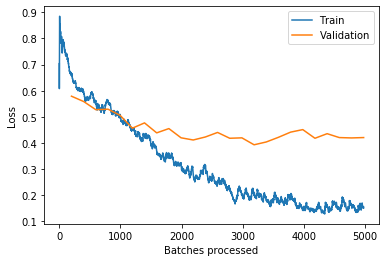

In [6]:
learn.recorder.plot_losses()

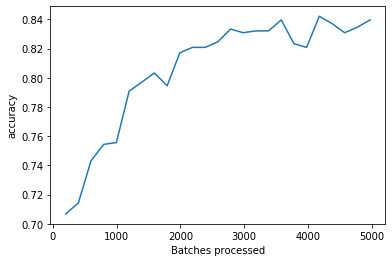

In [7]:
learn.recorder.plot_metrics()

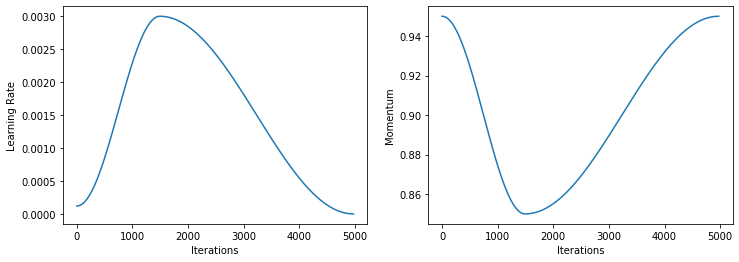

In [8]:
learn.recorder.plot_lr(show_moms=True)

In [9]:
learn.opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99))

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [ ]:
interp.plot_top_losses(k=16)

In [ ]:
learn
